**Assignment 7**- Clustering Algorithm

Perform clustering (hierarchical,K means clustering and DBSCAN) for the airlines data to obtain optimum number of clusters. 
Draw the inferences from the clusters obtained

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import power_transform
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

In [3]:
data=pd.read_excel('/content/EastWestAirlines.xlsx',sheet_name='data')

In [4]:
data.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [5]:
data.columns

Index(['ID#', 'Balance', 'Qual_miles', 'cc1_miles', 'cc2_miles', 'cc3_miles',
       'Bonus_miles', 'Bonus_trans', 'Flight_miles_12mo', 'Flight_trans_12',
       'Days_since_enroll', 'Award?'],
      dtype='object')

Removing ID# column

In [7]:
d1=data.drop('ID#',axis=1)
d1.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1


In [8]:
d1.info()                                             ## no null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Balance            3999 non-null   int64
 1   Qual_miles         3999 non-null   int64
 2   cc1_miles          3999 non-null   int64
 3   cc2_miles          3999 non-null   int64
 4   cc3_miles          3999 non-null   int64
 5   Bonus_miles        3999 non-null   int64
 6   Bonus_trans        3999 non-null   int64
 7   Flight_miles_12mo  3999 non-null   int64
 8   Flight_trans_12    3999 non-null   int64
 9   Days_since_enroll  3999 non-null   int64
 10  Award?             3999 non-null   int64
dtypes: int64(11)
memory usage: 343.8 KB


In [ ]:
d1[data.duplicated(keep=False)]

Checking outliers using boxplot and distribution of data

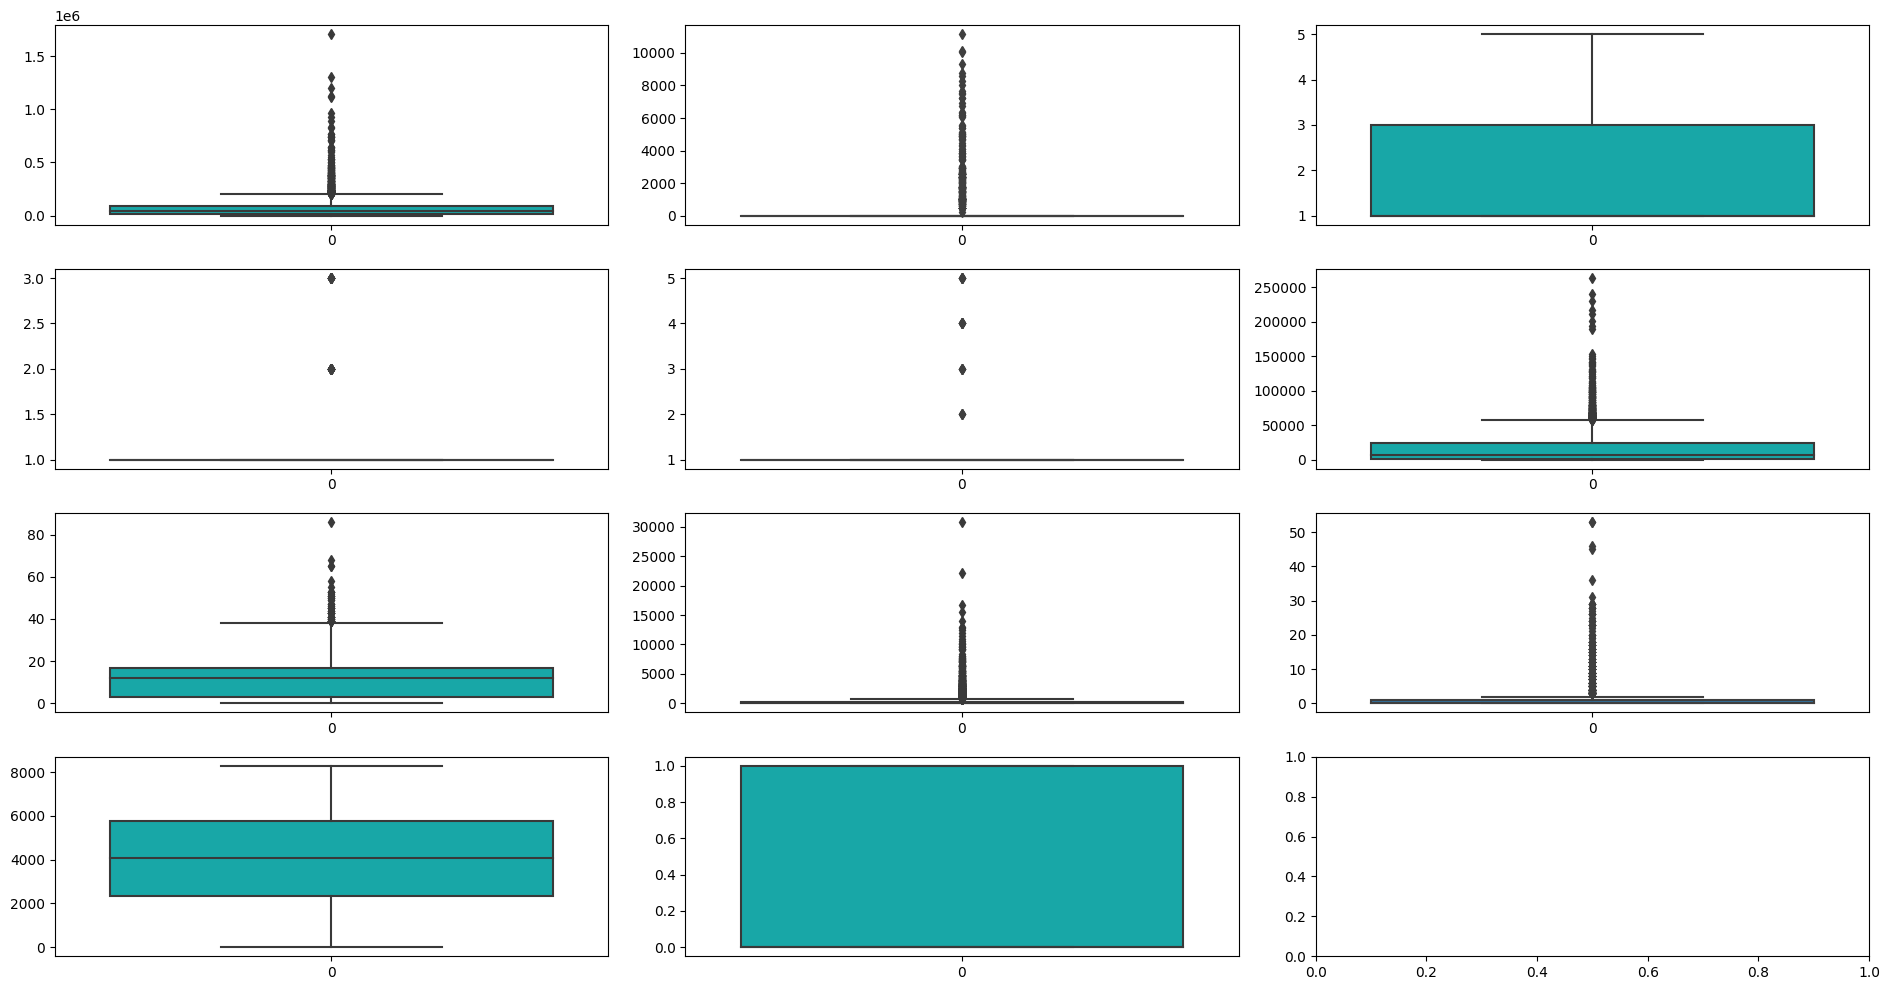

In [17]:
fig, ax = plt.subplots(4, 3, figsize=(19,10))
sns.boxplot(d1.Balance, ax=ax[0,0],color='c')
sns.boxplot(d1.Qual_miles, ax=ax[0,1])
sns.boxplot(d1.cc1_miles, ax=ax[0,2],color='c')
sns.boxplot(d1.cc2_miles, ax=ax[1,0])
sns.boxplot(d1.cc3_miles, ax=ax[1,1])
sns.boxplot(d1.Bonus_miles, ax=ax[1,2],color='c')
sns.boxplot(d1.Bonus_trans, ax=ax[2,0],color='c')
sns.boxplot(d1.Flight_miles_12mo, ax=ax[2,1],color='c')
sns.boxplot(d1. Flight_trans_12, ax=ax[2,2])
sns.boxplot(d1.Days_since_enroll, ax=ax[3,0],color='c')
sns.boxplot(d1["Award?"] , ax=ax[3,1],color='c')
plt.tight_layout()
plt.show()

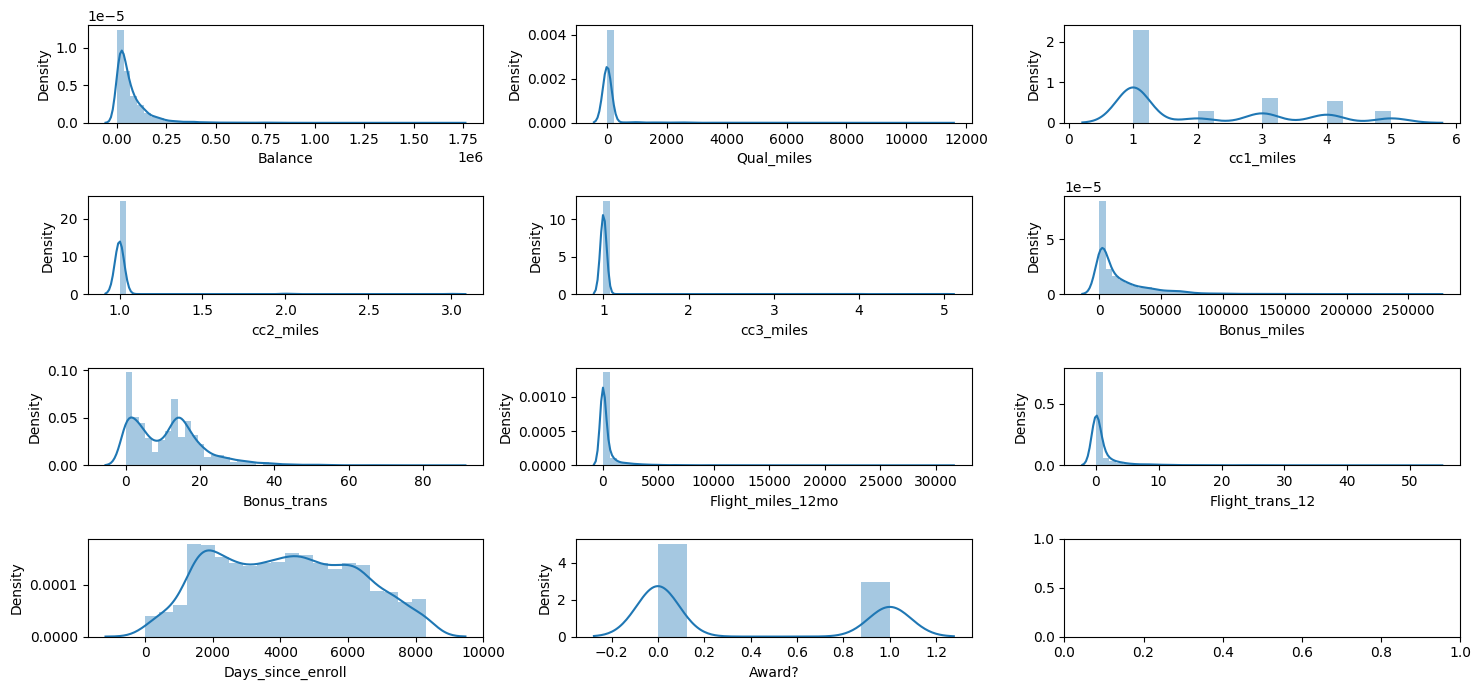

In [19]:
fig,ax = plt.subplots(4, 3, figsize=(15,7))
sns.distplot(d1.Balance, ax=ax[0,0])
sns.distplot(d1.Qual_miles, ax=ax[0,1])
sns.distplot(d1.cc1_miles, ax=ax[0,2])
sns.distplot(d1.cc2_miles, ax=ax[1,0])
sns.distplot(d1.cc3_miles, ax=ax[1,1])
sns.distplot(d1.Bonus_miles, ax=ax[1,2])
sns.distplot(d1.Bonus_trans, ax=ax[2,0])
sns.distplot(d1.Flight_miles_12mo, ax=ax[2,1])
sns.distplot(d1. Flight_trans_12, ax=ax[2,2])
sns.distplot(d1.Days_since_enroll, ax=ax[3,0])
sns.distplot(d1["Award?"] , ax=ax[3,1])
plt.tight_layout()
plt.show()

Using power transformation to standardise the distribution of data

In [21]:
d2=d1[["Balance","Qual_miles","cc1_miles","cc2_miles","cc3_miles","Bonus_miles","Bonus_trans","Flight_miles_12mo","Flight_trans_12","Days_since_enroll","Award?"]].values
d2_power=power_transform(d2, method='yeo-johnson')        ##by default its yeo-johnson( both -ve and +ve values) , box-cox only works with +ve values

In [22]:
d2=pd.DataFrame(d2_power,columns=["Balance","Qual_miles","cc1_miles","cc2_miles","cc3_miles","Bonus_miles","Bonus_trans","Flight_miles_12mo","Flight_trans_12","Days_since_enroll","Award?"]) 

In [23]:
d2

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,-0.346816,-0.244743,-0.844766,0.0,0.0,-1.178402,-1.329671,-0.683308,-0.674970,1.321776,-0.766919
1,-0.633084,-0.244743,-0.844766,0.0,0.0,-1.132416,-1.074960,-0.683308,-0.674970,1.308873,-0.766919
2,-0.038549,-0.244743,-0.844766,0.0,0.0,-0.191941,-0.688822,-0.683308,-0.674970,1.335468,-0.766919
3,-0.821989,-0.244743,-0.844766,0.0,0.0,-0.924946,-1.329671,-0.683308,-0.674970,1.302415,-0.766919
4,0.723596,-0.244743,1.343165,0.0,0.0,1.169363,1.329711,1.549026,1.685925,1.295549,1.303918
...,...,...,...,...,...,...,...,...,...,...,...
3994,-0.662730,-0.244743,-0.844766,0.0,0.0,0.153811,-0.688822,1.346970,1.081077,-1.364712,1.303918
3995,0.340486,-0.244743,-0.844766,0.0,0.0,-0.727886,-0.530613,-0.683308,-0.674970,-1.369774,1.303918
3996,0.460388,-0.244743,1.058591,0.0,0.0,0.795077,-0.134235,-0.683308,-0.674970,-1.365345,1.303918
3997,0.200904,-0.244743,-0.844766,0.0,0.0,-0.924946,-1.329671,1.446453,1.081077,-1.365977,-0.766919


Checking the distribution of data

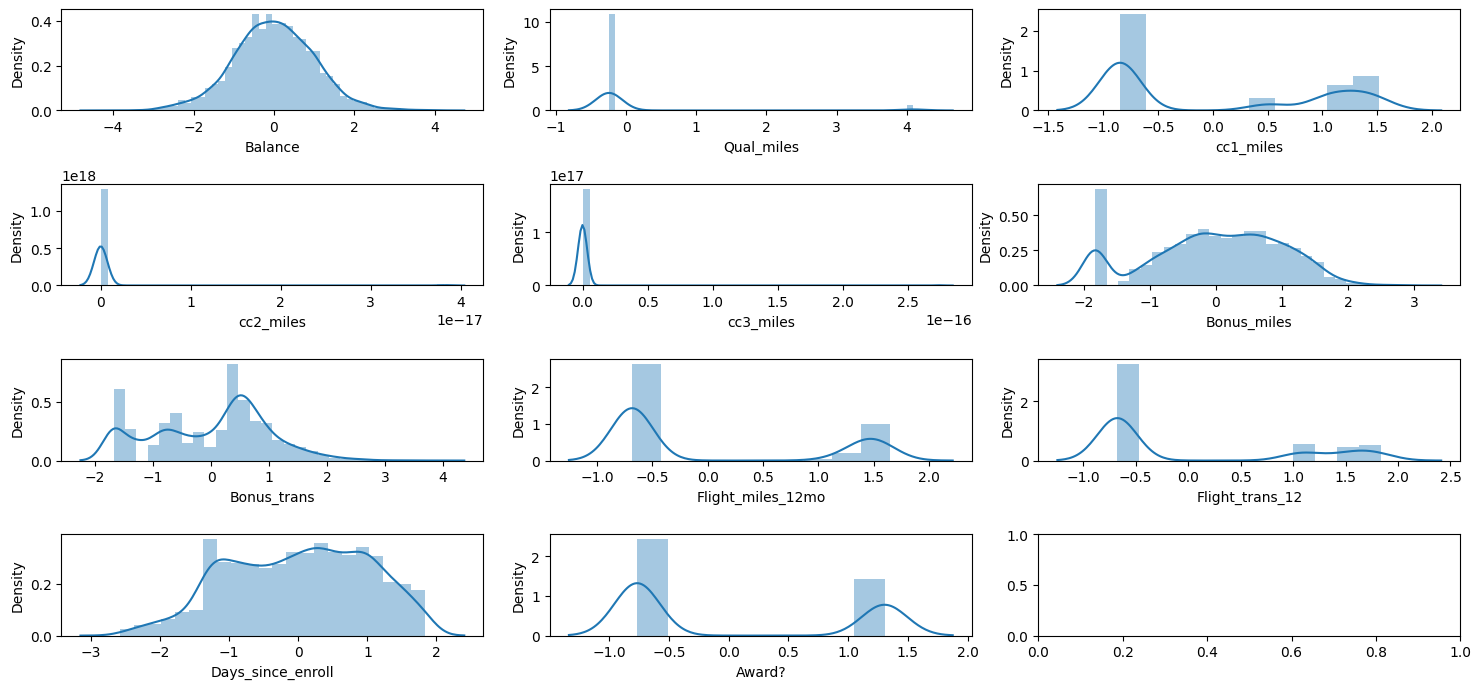

In [24]:
fig, ax = plt.subplots(4, 3, figsize=(15,7))
sns.distplot(d2.Balance, ax=ax[0,0])
sns.distplot(d2.Qual_miles, ax=ax[0,1])
sns.distplot(d2.cc1_miles, ax=ax[0,2])
sns.distplot(d2.cc2_miles, ax=ax[1,0])
sns.distplot(d2.cc3_miles, ax=ax[1,1])
sns.distplot(d2.Bonus_miles, ax=ax[1,2])
sns.distplot(d2.Bonus_trans, ax=ax[2,0])
sns.distplot(d2.Flight_miles_12mo, ax=ax[2,1])
sns.distplot(d2.Flight_trans_12, ax=ax[2,2])
sns.distplot(d2.Days_since_enroll, ax=ax[3,0])
sns.distplot(d2["Award?"] , ax=ax[3,1])
plt.tight_layout()
plt.show()

Creating Clusters:- 1) Hierarchical Clustering

Average linkage method

Text(0.5, 1.0, 'Dendogram')

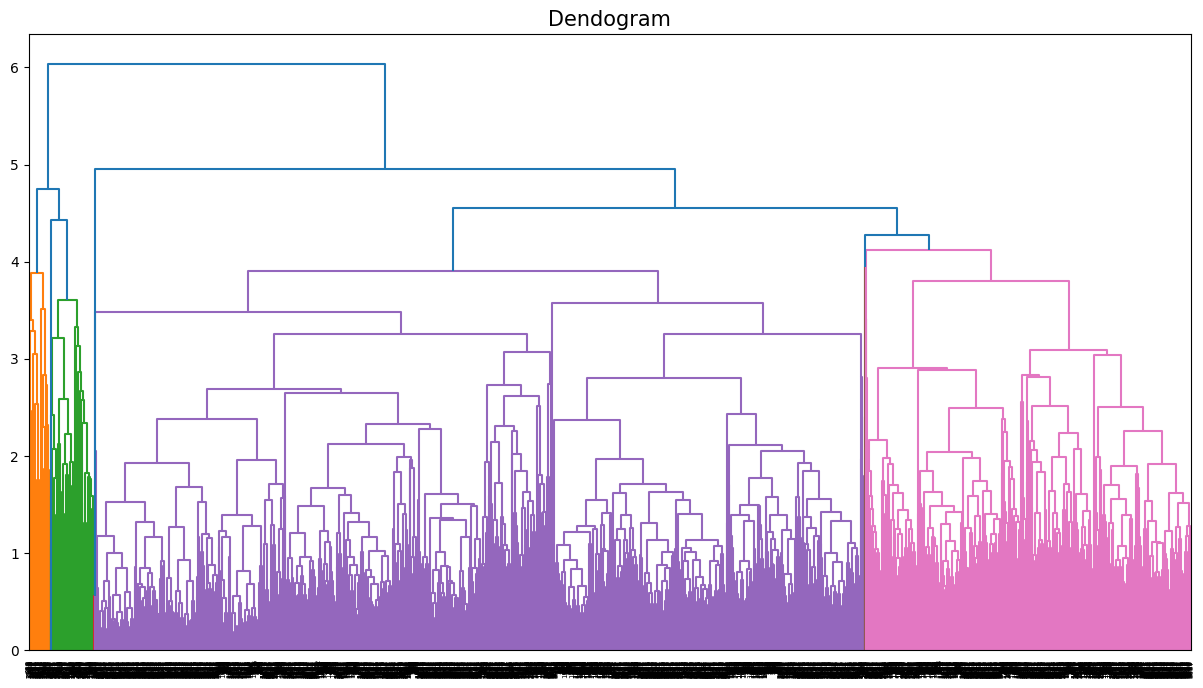

In [26]:
fig=plt.figure(figsize=(15,8))                                                  ## Average Linkage method
dendrogram = sch.dendrogram(sch.linkage(d2_power, method='average'))
plt.title("Dendogram",size=15)

Creating Agglomerative Clustering

In [27]:
A1=AgglomerativeClustering(n_clusters=5, affinity = 'euclidean', linkage = 'average')

Fitting the data on model

In [28]:
y_A1= A1.fit_predict(d2_power)
Clusters=pd.DataFrame(y_A1,columns=['Clusters'])

In [30]:
data['cluster'] = y_A1                       ## Creating new column to see clusters

In [31]:
data.groupby('cluster').agg(['mean']).reset_index()

,cluster,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,1799.350993,170339.198675,2508.019868,2.278146,1.013245,1.013245,28717.337748,18.344371,2574.390728,7.768212,4478.728477,0.768212
1,1,1891.090828,104075.087266,0.000000,2.290294,1.017809,1.016919,23897.578807,15.159394,1291.878896,3.845058,4368.430098,0.547640
2,2,1425.000000,125.000000,0.000000,1.000000,1.000000,1.000000,125.000000,1.000000,125.000000,1.000000,5163.500000,0.000000
3,3,2028.933333,57973.546667,2634.706667,2.000000,1.000000,1.000000,15002.626667,10.026667,0.000000,0.000000,4111.026667,0.400000
4,4,2079.624622,55659.328172,0.000000,1.951662,1.013595,1.010574,13694.672961,9.761329,0.000000,0.000000,3991.476586,0.271903


How many categories are there in each cluster

In [34]:
for i in range(5):
    print("cluster", i)
    print("Total Members:", len(list(data[data['cluster'] == i]['ID#'].values)))
    print()

cluster 0
Total Members: 151

cluster 1
Total Members: 1123

cluster 2
Total Members: 2

cluster 3
Total Members: 75

cluster 4
Total Members: 2648



Applying centroid linkage method and following above steps

Text(0.5, 1.0, 'Dendogram')

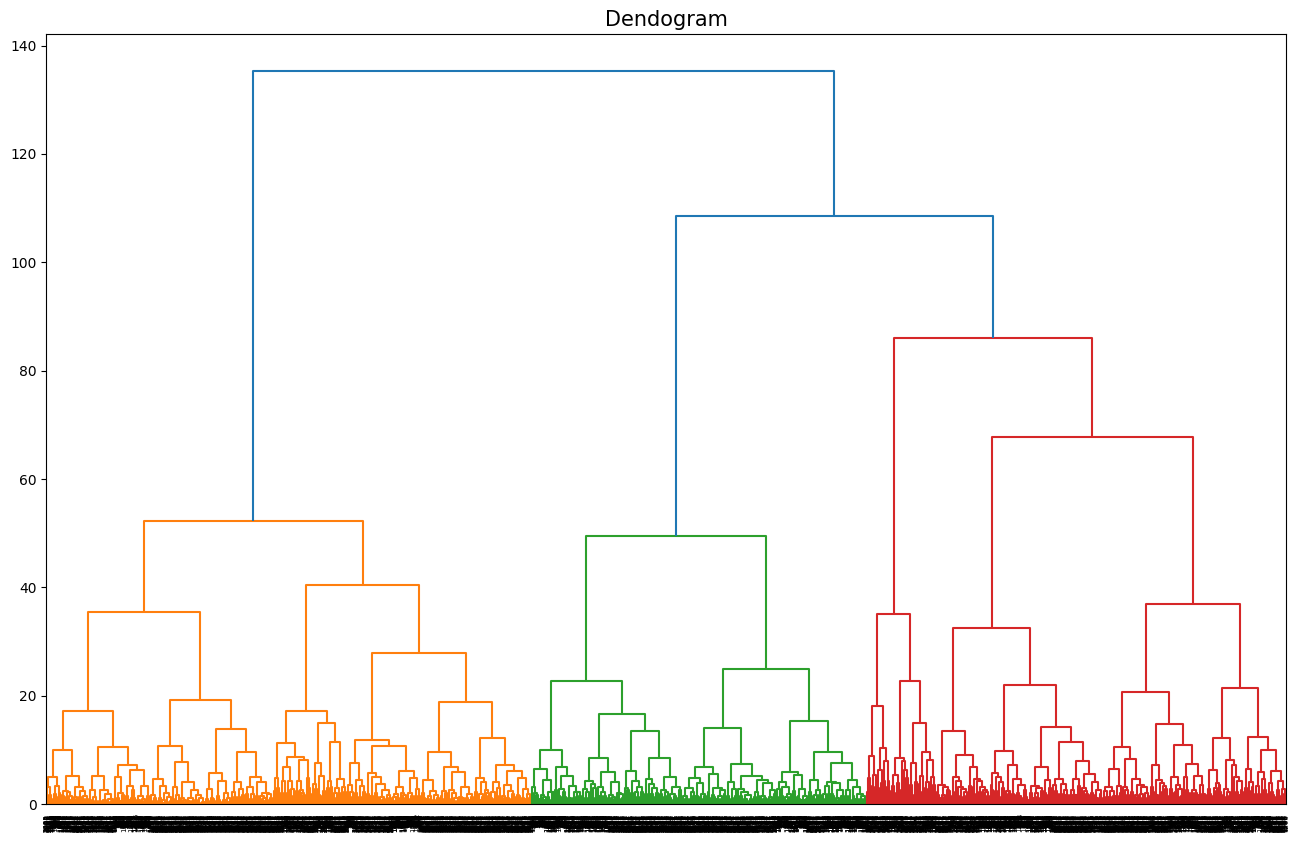

In [35]:
fig=plt.figure(figsize=(16,10))
dendrogram = sch.dendrogram(sch.linkage(d2_power, method='ward'))
plt.title("Dendogram",size=15)

In [37]:
A2 = AgglomerativeClustering(n_clusters=5, affinity = 'euclidean', linkage = 'ward')        ##creating cluster

In [38]:
y_A2 = A2.fit_predict(d2_power)
Clusters=pd.DataFrame(y_A2,columns=['Clusters'])

In [39]:
data['cluster'] = y_A2

In [40]:
data.groupby('cluster').agg(['mean']).reset_index()

,cluster,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,2270.985322,33419.559030,0.000000,1.000000,1.022336,1.005105,2837.693044,5.463944,0.000000,0.000000,3631.267390,0.151883
1,1,2113.270270,77788.952703,0.000000,1.000000,1.030405,1.000000,6038.932432,8.885135,1403.608108,4.155405,3981.564189,0.429054
2,2,1802.231267,87897.735430,0.000000,3.331175,1.000925,1.018501,29432.774283,15.990749,0.000000,0.000000,4513.629972,0.445883
3,3,1875.539823,133049.712389,2550.061947,2.185841,1.008850,1.008850,24165.995575,15.584071,1720.057522,5.190265,4356.703540,0.646018
4,4,1642.568480,132880.887430,0.000000,3.718574,1.003752,1.035647,43643.870544,22.075047,1163.403377,3.489681,4801.103189,0.677298


In [41]:
for i in range(5):
    print("cluster", i)
    print("Total Members:", len(list(data[data['cluster'] == i]['ID#'].values)))
    print()

cluster 0
Total Members: 1567

cluster 1
Total Members: 592

cluster 2
Total Members: 1081

cluster 3
Total Members: 226

cluster 4
Total Members: 533



Applying Complete linkage method

Text(0.5, 1.0, 'Dendogram')

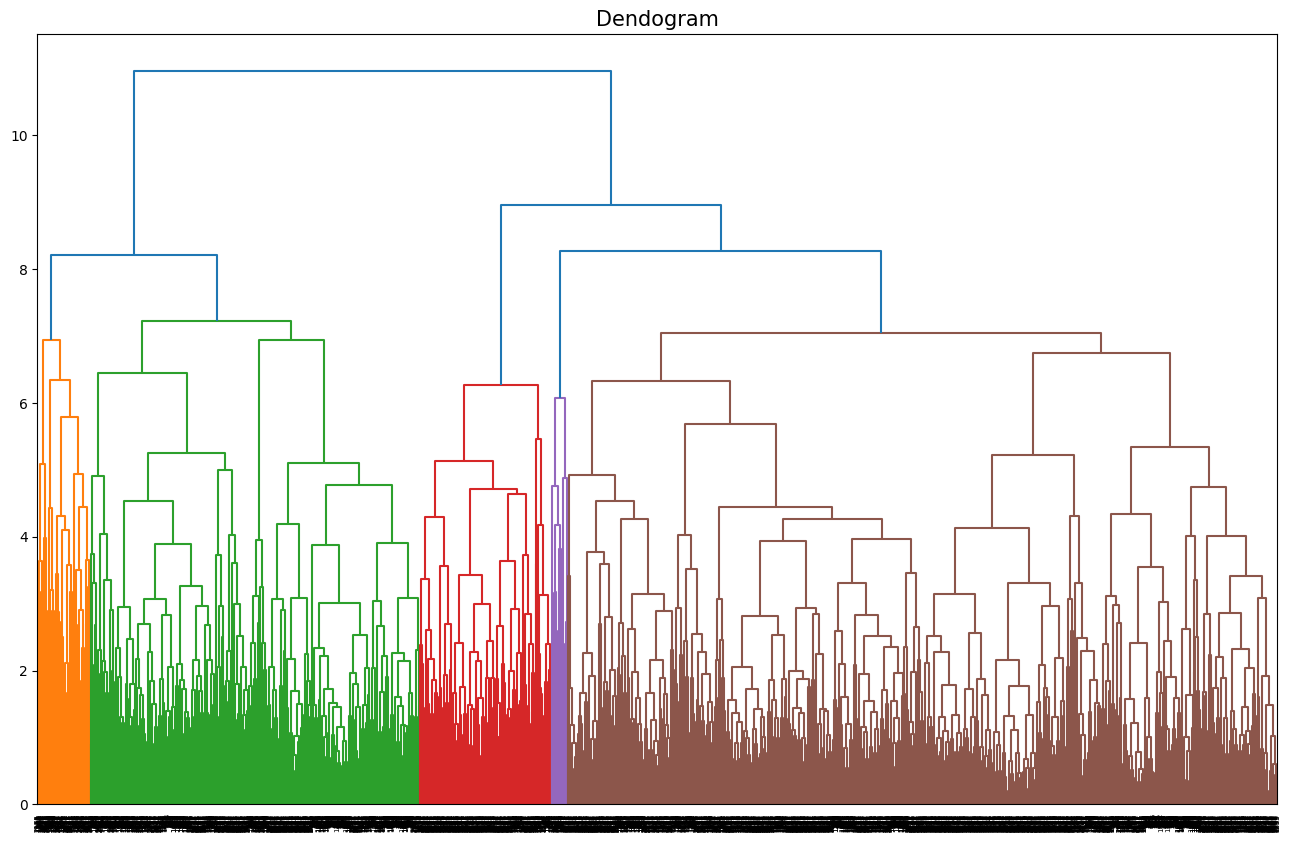

In [42]:
fig=plt.figure(figsize=(16,10))
dendrogram = sch.dendrogram(sch.linkage(d2_power, method='complete'))
plt.title("Dendogram",size=15)

In [43]:
A3= AgglomerativeClustering(n_clusters=5, affinity = 'euclidean', linkage = 'complete')        ##creating cluster

In [44]:
y_A3 = A3.fit_predict(d2_power)
Clusters=pd.DataFrame(y_A3,columns=['Clusters'])

In [45]:
data['cluster'] = y_A3

In [46]:
data.groupby('cluster').agg(['mean']).reset_index()

,cluster,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,1475.911404,145838.029218,0.000000,3.541942,1.004713,1.032045,39928.083883,19.713478,809.139491,2.377003,5095.663525,0.553252
1,1,2168.733392,39231.260927,0.000000,1.506119,1.016608,1.005682,7506.878497,7.910839,53.164773,0.161713,3831.724213,0.220717
2,2,2607.044811,46620.754717,0.000000,1.268868,1.030660,1.000000,8399.268868,9.099057,1110.594340,3.367925,3094.386792,0.573113
3,3,2367.264151,46202.320755,2805.528302,1.000000,1.000000,1.000000,2909.528302,3.962264,188.245283,0.566038,3446.471698,0.264151
4,4,1724.895954,159656.138728,2471.797688,2.549133,1.011561,1.011561,30678.092486,19.144509,2189.341040,6.606936,4635.560694,0.763006


In [47]:
for i in range(5):
    print("cluster", i)
    print("Total Members:", len(list(data[data['cluster'] == i]['ID#'].values)))
    print()

cluster 0
Total Members: 1061

cluster 1
Total Members: 2288

cluster 2
Total Members: 424

cluster 3
Total Members: 53

cluster 4
Total Members: 173



Applying Single linkage method

Text(0.5, 1.0, 'Dendogram')

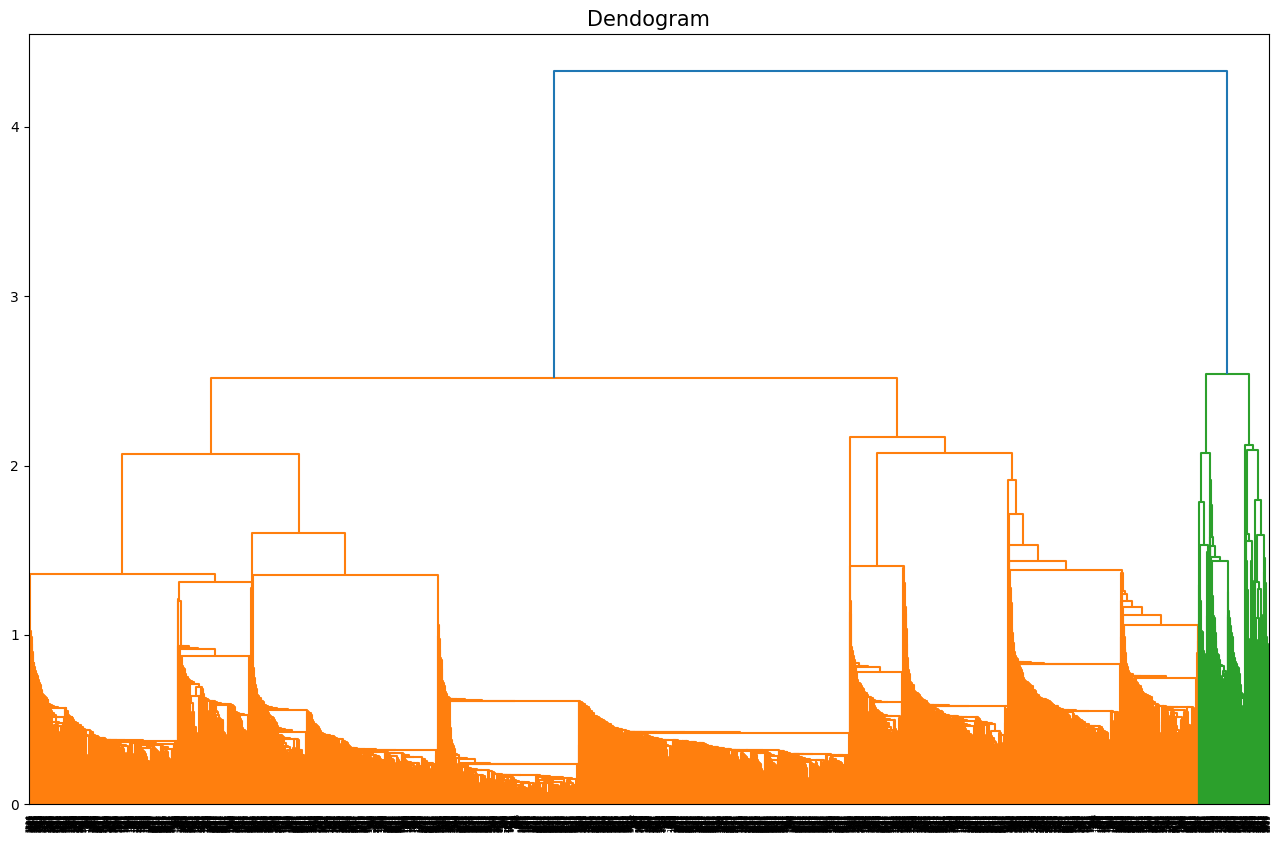

In [48]:
fig=plt.figure(figsize=(16,10))
dendrogram = sch.dendrogram(sch.linkage(d2_power, method='single'))
plt.title("Dendogram",size=15)

In [49]:
A4= AgglomerativeClustering(n_clusters=5, affinity = 'euclidean', linkage = 'single')        ##creating cluster

In [50]:
y_A4= A4.fit_predict(d2_power)
Clusters=pd.DataFrame(y_A4,columns=['Clusters'])

In [54]:
data['cluster'] = y_A4              ## creating column with cluster label/number

In [55]:
data.groupby('cluster').agg(['mean']).reset_index()

,cluster,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,2028.933333,57973.546667,2634.706667,2.000000,1.000000,1.000000,15002.626667,10.026667,0.000000,0.000000,4111.026667,0.400000
1,1,1799.350993,170339.198675,2508.019868,2.278146,1.013245,1.013245,28717.337748,18.344371,2574.390728,7.768212,4478.728477,0.768212
2,2,3018.000000,0.000000,0.000000,1.000000,1.000000,1.000000,5491.000000,18.000000,2116.000000,5.000000,3204.000000,1.000000
3,3,2079.624622,55659.328172,0.000000,1.951662,1.013595,1.010574,13694.672961,9.761329,0.000000,0.000000,3991.476586,0.271903
4,4,1889.258897,103982.716192,0.000000,2.289146,1.017794,1.016904,23871.654804,15.131673,1289.069395,3.838968,4370.880783,0.546263


In [56]:
for i in range(5):
    print("cluster", i)
    print("Total Members:", len(list(data[data['cluster'] == i]['ID#'].values)))
    print()

cluster 0
Total Members: 75

cluster 1
Total Members: 151

cluster 2
Total Members: 1

cluster 3
Total Members: 2648

cluster 4
Total Members: 1124



**2) K-Means Clustering method**

Plotting elbow curve for choosing k

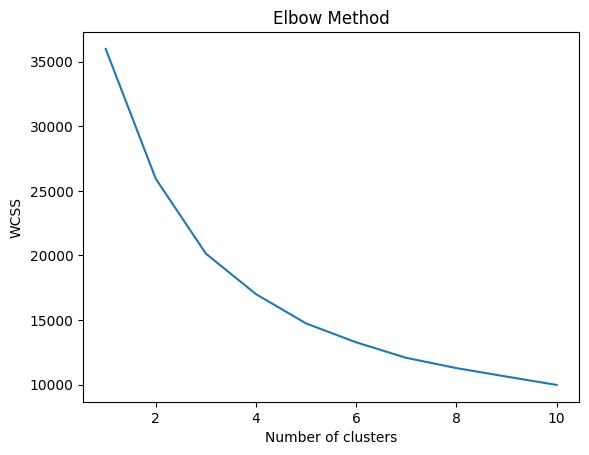

In [58]:
wcss = []                                             ## wcss= within-cluster sum of square
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(d2_power)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

Creating 5 clusters using k-means

In [59]:
K_cluster= KMeans(5, random_state=42)
K_cluster.fit(d2_power)

KMeans(n_clusters=5, random_state=42)

In [61]:
K_label=K_cluster.labels_
data['cluster'] = K_cluster.labels_
K_cluster.cluster_centers_

array([[-6.75212840e-01, -2.32991180e-01, -8.35590446e-01,
         4.66045113e-19,  7.89631277e-33, -9.09080934e-01,
        -8.19433548e-01, -6.82084186e-01, -6.73778986e-01,
        -3.10971055e-01, -5.14035484e-01],
       [ 3.71613101e-01, -2.44743303e-01,  9.10506666e-01,
         2.91327607e-19,  2.55720899e-18,  7.17781846e-01,
         5.92471428e-01, -6.83308041e-01, -6.74970335e-01,
         2.39016631e-01,  1.81555873e-01],
       [ 1.60074522e-02, -2.44743303e-01, -8.19239258e-01,
         7.32640630e-19, -4.23704588e-33, -2.79105284e-01,
        -2.72262658e-01,  1.45172819e+00,  1.43587521e+00,
        -9.52588092e-02,  7.15349601e-02],
       [ 7.54505594e-01, -2.44743303e-01,  1.11374957e+00,
         2.77052025e-19,  2.98460591e-18,  1.03665259e+00,
         1.04603128e+00,  1.45646102e+00,  1.41053352e+00,
         3.58290326e-01,  6.72519442e-01],
       [ 5.95617244e-01,  4.08591363e+00,  6.27073775e-02,
         1.71909534e-19,  1.23462301e-18,  3.71406537e-01,
  

In [62]:
B=data.iloc[:,1:].groupby('cluster').agg(['mean']).reset_index()

In [63]:
B

,cluster,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,28510.248982,8.273406,1.006784,1.015604,1.000000,2228.580054,4.679104,0.033921,0.000678,3501.601764,0.122117
1,1,89382.907549,0.000000,3.128923,1.011026,1.023749,27971.685327,16.074640,0.000000,0.000000,4593.606446,0.458015
2,2,69243.130890,0.000000,1.020942,1.026178,1.000000,5429.420593,8.059337,1211.178010,3.598604,3907.469459,0.404887
3,3,140109.272232,0.000000,3.607985,1.009074,1.034483,43060.114338,22.517241,1373.820327,4.096189,4849.402904,0.695100
4,4,135354.193694,2541.076577,2.207207,1.009009,1.009009,24601.418919,15.864865,1751.049550,5.283784,4422.950450,0.657658


In [64]:
for i in range(5):                                                               ## no.of categories in each cluster
    print("cluster", i)
    print("Total Members:", len(list(data[data['cluster'] == i]['ID#'].values)))
    print()

cluster 0
Total Members: 1474

cluster 1
Total Members: 1179

cluster 2
Total Members: 573

cluster 3
Total Members: 551

cluster 4
Total Members: 222



**3) DBSCAN Clustering method**

In [65]:
from sklearn.cluster import DBSCAN

In [66]:
DB= DBSCAN(eps=0.8, min_samples=6)
DB.fit(d2)

DBSCAN(eps=0.8, min_samples=6)

In [67]:
DB.labels_

array([0, 0, 0, ..., 4, 6, 0])

In [68]:
C=pd.DataFrame(DB.labels_,columns=['DB_cluster'])

In [69]:
C

,DB_cluster
0,0
1,0
2,0
3,0
4,1
...,...
3994,3
3995,5
3996,4
3997,6


In [70]:
d3 = pd.concat([data,C],axis=1)

In [71]:
d3

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,cluster,DB_cluster
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,0,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,0,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,0,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,2,3
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,0,5
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,1,4
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,2,6


In [72]:
data

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,cluster
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,2
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,0
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,2


**Calculating Silhouette score**-to calculate performance of clustering models

In [89]:
s1=(metrics.silhouette_score(d2_power,y_A1))        ##Average Linkage
s1

0.24511194875209383

In [90]:
s2=(metrics.silhouette_score(d2_power,y_A2))        ##Centroid linkage
s2

0.3240550069814065

In [91]:
s3=(metrics.silhouette_score(d2_power,y_A3))        ##Complete linkage
s3

0.19985213995606269

In [92]:
s4=(metrics.silhouette_score(d2_power,y_A4))        ##Single linkage
s4

0.2971406781364072

In [93]:
Ks=(metrics.silhouette_score(d2_power,K_label))      ##Kmeans
Ks

0.32518610185189556

In [94]:
DBs=(metrics.silhouette_score(d2_power,d3.DB_cluster))       ##DBscan
DBs

0.2340657983934542

Consolidating the results

In [95]:
p={'Model':['Average','Centroid','Complete','Single','Kmeans','DBScan'],
  'Sillhouette score':[s1,s2,s3,s4,Ks,DBs]
  }
p=pd.DataFrame(p)
p

,Model,Sillhouette score
0,Average,0.245112
1,Centroid,0.324055
2,Complete,0.199852
3,Single,0.297141
4,Kmeans,0.325186
5,DBScan,0.234066


**Conclusion**- From the consolidated data, we found that Kmeans gave a high Silhouette score. Five clusters are sufficient for the dataset to make inference.
In hierarchical method,centroid linkage method gave a high silhouette score as Kmeans.But it is more complex.
DBscan gave a low Silhouette score,which is not good for this dataset to identify passengers with similar characteritics.
Thus,it is better to go with Kmeans clustering to identify passengers with similar characteristics.